<a href="https://colab.research.google.com/github/beckynevin/mockIllustris/blob/master/CNN_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Now load in the data and randomly split into training and test data
# Upload the pngs.zip file 
!unzip pngs.zip

Archive:  pngs.zip
   creating: pngs/
   creating: pngs/mergers/
  inflating: pngs/mergers/fg1_m13_degraded_0_120.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_130.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_140.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_145.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_150.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_155.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_170.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_175.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_180.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_185.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_190.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_195.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_200.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_205.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_210.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_215.png  
  inflating: pngs/mergers/fg1_m13_degraded_0_220.png  


In [ ]:
# Everything that follows I took from Patrick Steegstra's great tutorial on loading in data
# from this website: https://kapernikov.com/tutorial-image-classification-with-scikit-learn/



import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    #data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [ ]:
import os
# modify to fit your system
data_path = 'pngs/'
#fr'{os.getenv("HOME")}/downloads/animalface/Image'
os.listdir(data_path)
# These are the subdirectories and will become the labels :)

['mergers', 'nonmergers']

In [ ]:
base_name = 'galaxies'
width = 80
 
include = {'mergers', 'nonmergers'}# I guess you have an option to not include them?
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


mergers
nonmergers


In [ ]:
from collections import Counter
import numpy as np
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  1339
keys:  ['label', 'filename', 'data']
image shape:  (80, 80, 4)
labels: ['mergers' 'nonmergers']


Counter({'mergers': 814, 'nonmergers': 525})

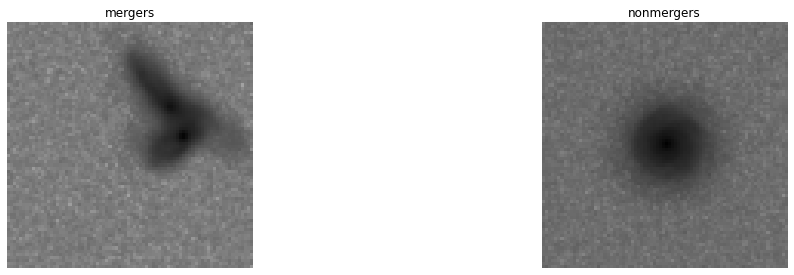

In [ ]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)


In [ ]:
print(np.shape(data['data'][0]))
print(data['data'][0])
#STOP

X_flat = np.array(data['data'])[:,:,:,0]
print(np.shape(X_flat), print(type(X_flat)))
print(np.shape(X_flat)[0], np.shape(X_flat)[1], np.shape(X_flat)[2])
# But now you have to reshape so that there's a channel dimension
X = np.array(tf.expand_dims(X_flat, axis=-1))
#np.reshape(X_flat, (int(np.shape(X_flat)[0]), int(np.shape(X_flat)[1]), int(np.shape(X_flat[2])), 1))
print(np.shape(X))
y = np.array(data['label'])

(80, 80, 4)
[[[0.48791667 0.48791667 0.48791667 0.99215686]
  [0.48487745 0.48487745 0.48487745 0.99215686]
  [0.51840686 0.51840686 0.51840686 0.99215686]
  ...
  [0.47237669 0.47237669 0.47237669 0.99215686]
  [0.46830882 0.46830882 0.46830882 0.99215686]
  [0.41553906 0.41553906 0.41553906 0.99215686]]

 [[0.49127405 0.49127405 0.49127405 0.99215686]
  [0.48076118 0.48076118 0.48076118 0.99215686]
  [0.493017   0.493017   0.493017   0.99215686]
  ...
  [0.50382123 0.50382123 0.50382123 0.99215686]
  [0.46438725 0.46438725 0.46438725 0.99215686]
  [0.48955882 0.48955882 0.48955882 0.99215686]]

 [[0.50456036 0.50456036 0.50456036 0.99215686]
  [0.4777428  0.4777428  0.4777428  0.99215686]
  [0.54901195 0.54901195 0.54901195 0.99215686]
  ...
  [0.47818627 0.47818627 0.47818627 0.99215686]
  [0.48602482 0.48602482 0.48602482 0.99215686]
  [0.45830882 0.45830882 0.45830882 0.99215686]]

 ...

 [[0.45095665 0.45095665 0.45095665 0.99215686]
  [0.46456112 0.46456112 0.46456112 0.99215686

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

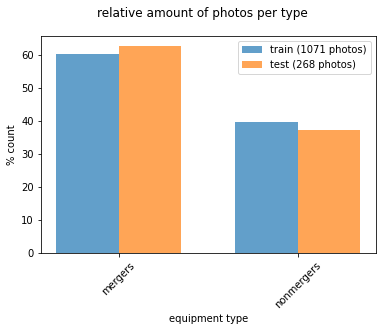

In [ ]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

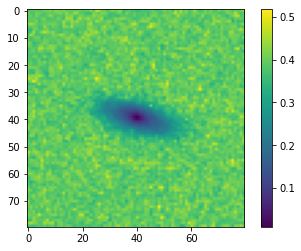

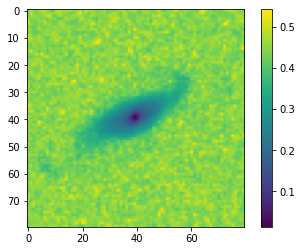

In [ ]:
# Why does the data have such a strange shape?
import matplotlib.pyplot as plt

plt.imshow(X_train[0][:,:,0])
plt.colorbar()
plt.show()

plt.imshow(X_test[0][:,:,0])
plt.colorbar()
plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80,80, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [ ]:
# Apparently, I need to turn the X and y into tokenized things
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2) # because its only merger and nonmerger

tokenizer.fit_on_texts(y_train)
sequences = tokenizer.texts_to_sequences(y_train)
y_train_new = pad_sequences(sequences, maxlen=1)
print(y_train)
print(y_train_new)

tokenizer.fit_on_texts(y_test)
sequences = tokenizer.texts_to_sequences(y_test)
y_test_new = pad_sequences(sequences, maxlen=1)

['nonmergers' 'mergers' 'nonmergers' ... 'nonmergers' 'nonmergers'
 'nonmergers']
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
# This will be a useful website once I get it running:
# https://medium.com/i-a/a-simple-convolutional-neural-network-with-keras-google-colaboratory-e5f8207b799f 
model.compile(optimizer='adam', # what does this stand for?
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#print(X_train.dtypes)
history = model.fit(X_train, y_train_new, epochs=10, 
                    validation_data=(X_test, y_test_new))

Epoch 1/10
34/34 [==============================] - 11s 309ms/step - loss: 0.6736 - accuracy: 0.6175 - val_loss: 0.6589 - val_accuracy: 0.6679
Epoch 2/10
34/34 [==============================] - 10s 303ms/step - loss: 0.5991 - accuracy: 0.7116 - val_loss: 0.5719 - val_accuracy: 0.7500
Epoch 3/10
34/34 [==============================] - 10s 305ms/step - loss: 0.5254 - accuracy: 0.7685 - val_loss: 0.5100 - val_accuracy: 0.7575
Epoch 4/10
34/34 [==============================] - 10s 303ms/step - loss: 0.5161 - accuracy: 0.7587 - val_loss: 0.5338 - val_accuracy: 0.7164
Epoch 5/10
34/34 [==============================] - 10s 306ms/step - loss: 0.5137 - accuracy: 0.7531 - val_loss: 0.5042 - val_accuracy: 0.7687
Epoch 6/10
34/34 [==============================] - 10s 306ms/step - loss: 0.4945 - accuracy: 0.7740 - val_loss: 0.5143 - val_accuracy: 0.7687
Epoch 7/10
34/34 [==============================] - 10s 303ms/step - loss: 0.5179 - accuracy: 0.7690 - val_loss: 0.5108 - val_accuracy: 0.7239

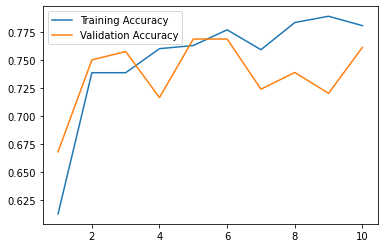

In [ ]:
print(history)

epoch_list = list(range(1, len(history.history['accuracy']) + 1))
plt.plot(epoch_list, history.history['accuracy'], epoch_list, history.history['val_accuracy'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show()

In [ ]:
# Okay, now get into interpretability, where is it misclassifying?
